In [28]:
import pandas as pd

hospital = pd.read_csv("Heart_Disease_Prediction.csv")

In [29]:
hospital

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [30]:
#presence - 1
#Absence - 0

hospital["Heart Disease"] = hospital["Heart Disease"].map({"Presence": 1, "Absence": 0})

In [31]:
hospital

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [32]:
x = hospital.iloc[0:, 0:13]
y = hospital.iloc[0:, 13]

# split the x and y

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# we have to scale the dataset when using KNN
# this allows the algorithm to scale large values in the features before prediction

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
#we scale the features only (x) - x_train, x_test

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

#preferred we use 5 number of neighbors

In [40]:
pred = model.predict(x_train)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_train, pred)

array([[109,  11],
       [ 16,  80]], dtype=int64)

# confusion matrix table

<AxesSubplot:>

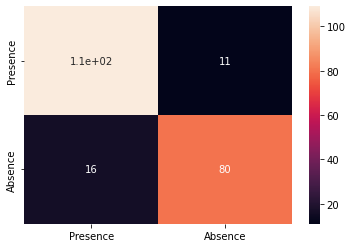

In [46]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_train, pred), annot=True, xticklabels=["Presence", "Absence"], yticklabels=["Presence", "Absence"])

#annot=True display values in a heatmap

# Support Vector Machine

In [47]:
# using the support vector machine algorithm

# also used for classification like the logistic regression and K-Nearest Neigbors

In [48]:
from sklearn import svm

In [51]:
model2 = svm.SVC()

#support vector classifier function

In [50]:
# linear support vector machine(svm)
# non - linear support vector machine (svm)

In [53]:
model2 = model2.fit(x_train, y_train)

In [55]:
pred2 = model2.predict(x_train)

In [56]:
confusion_matrix(y_train, pred2)

array([[114,   6],
       [ 11,  85]], dtype=int64)

Text(0.5, 1.0, 'SVM confusion matrix')

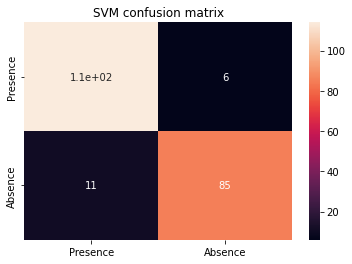

In [63]:
sns.heatmap(confusion_matrix(y_train, pred2), annot=True, 
            xticklabels=["Presence", "Absence"], 
        yticklabels=["Presence", "Absence"]).set_title("SVM confusion matrix")


#annot=True display values in a heatmap
#.set_title is used to display the title of a seaborn chart (i.e heatmap chart)
#xticklabels is used to display the labels on x axis
#yticklabels is used to display the labels on the y axis

# Naive Bayes algorithm

In [64]:
# can be used for classification problems

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
model3 = GaussianNB()

In [67]:
model3.fit(x_train, y_train)

GaussianNB()

In [68]:
model3.predict(x_train)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)